<a href="https://colab.research.google.com/github/ImperB-riven/Data-Visualization/blob/main/19110035_DV_TH01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập

1. Tìm hiểu ý nghĩa của các loại biểu đồ, đồ thị:
Comparison, Composition, Relationship, Distribution.
2. Thực hành: 

a) Load data ('COVID-19.csv') và trích lấy dữ liệu các cột sau: 'day','month','year','cases', 'deaths', 'countriesAndTerritories', 'continentExp' ( trích data này là data để thực hiện các yêu cầu dưới).

b) Vẽ 2 đồ thị histogram của columns casses và deaths trên cùng một cửa sổ (figure). (subplot)

c)Thống kê tổng số cases và deaths của từng quốc gia.

d) Vẽ biểu đồ bar biểu diễn tổng case của 10 quốc gia có tổng cases lớn nhất.(Bằng 2 cách pandas, seaborn trên cùng figure).

e) Tương tự d) nhưng biểu diễn tổng deaths của 10 quốc gia có tổng death lớn nhất.

f) Thông kê tổng số (cases) và (deaths) của từng lục địa (continentExp).

g) Vẽ biểu đồ bar để biểu diễn câu f) (mô tả : Trục ngang là các continentExp , mỗi continentExp có 2 cột biểu diễn cases và deaths) (Cả 2 cách pandas và seaborn trên cùng figure).

h) Trích data có columns là Việt Nam.

i) Thống kê số lượng cases và deaths theo từng tháng của Việt Nam bắt đầu từ 1/1/2020.

j) Vẽ biểu đồ đường để biểu i) (đồ thị gồm 2 line) và chú thích điểm lớn nhất trên từng line. (Dùng pandas hoặc seaborn).

## Bài tập 1

So sánh các loại biểu đồ:  
* **Comparison**: là biểu đồ dùng để so sánh 2 hoặc nhiều sự vật hiện tượng của dữ liệu.  
* **Composition**: là biểu đồ thể hiện dao động, thay đổi của dữ liệu phụ thuộc vào một yếu tố khác.
* **Relationship**: là biểu đồ thể hiện mối quan hệ của 2 hoặc nhiều sự vật hiện tượng của dữ liệu.
* **Distribution**: là biểu đồ dùng để biểu hiện sự phân phối của dữ liệu theo một yếu tố khác.

## Bài tập 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('COVID-19.csv')
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,20/10/2020,20,10,2020,87,5,Afghanistan,AF,AFG,38041757.0,Asia,2.105581
1,19/10/2020,19,10,2020,59,4,Afghanistan,AF,AFG,38041757.0,Asia,2.258045
2,18/10/2020,18,10,2020,68,3,Afghanistan,AF,AFG,38041757.0,Asia,2.218615
3,17/10/2020,17,10,2020,47,4,Afghanistan,AF,AFG,38041757.0,Asia,2.058265
4,16/10/2020,16,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.947860


### a)

In [ ]:
data['day']
data['month']
data['year']
cases = data[data['geoId'] == 'AF']['cases']
deaths = data[data['geoId'] == 'AF']['deaths']
cases.shape

(285,)

### b)

In [ ]:
cases

0      87
1      59
2      68
3      47
4       0
       ..
280     0
281     0
282     0
283     0
284     0
Name: cases, Length: 285, dtype: int64

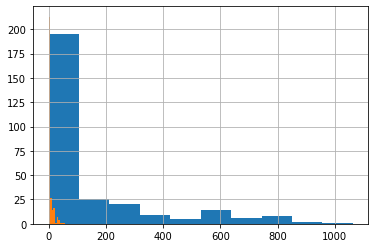

In [ ]:
cases.hist()
deaths.hist()

### c)

In [ ]:
countries_data = data.groupby(['countriesAndTerritories'])['cases','deaths'].agg('sum')
countries_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
countriesAndTerritories,,
Afghanistan,40287,1497
Albania,17350,454
Algeria,54616,1865
Andorra,3623,62
Angola,7622,247
...,...,...
Vietnam,1140,35
Western_Sahara,766,1
Yemen,2060,599


### d)

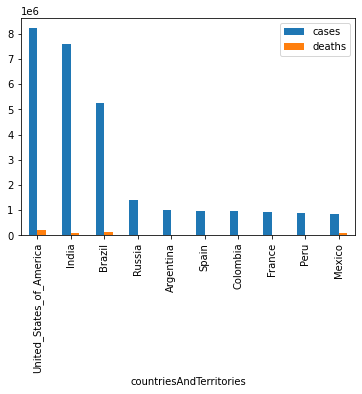

In [ ]:
top10_cases = countries_data.nlargest(10, ['cases'])
top10_cases.plot(kind = 'bar')

In [ ]:
top10_cases

,cases,deaths
countriesAndTerritories,,
United_States_of_America,8214755,220133
India,7597063,115197
Brazil,5250727,154176
Russia,1415316,24366
Argentina,1002649,26716
Spain,974449,33992
Colombia,965883,29102
France,910277,33623
Peru,870876,33820


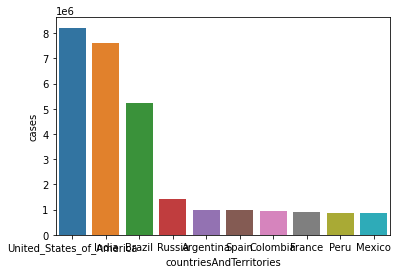

In [ ]:
sns.barplot(x = top10_cases.index, y='cases', data = top10_cases)

### e)

In [ ]:
countries_data.nlargest(10, ['deaths'])

,cases,deaths
countriesAndTerritories,,
United_States_of_America,8214755,220133
Brazil,5250727,154176
India,7597063,115197
Mexico,854926,86338
United_Kingdom,741212,43726
Italy,423578,36616
Spain,974449,33992
Peru,870876,33820
France,910277,33623


### f)

In [ ]:
continent_data = data.groupby(['continentExp'])['cases', 'deaths'].agg('sum')
continent_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
continentExp,,
Africa,1656480,39931
America,18977833,611701
Asia,12516197,224029
Europe,7284085,242594
Oceania,37214,1021
Other,696,7


### g)

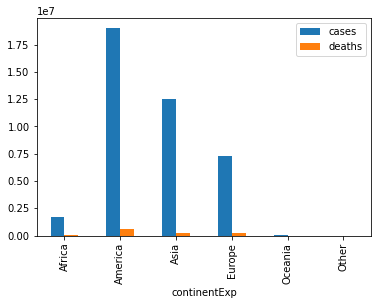

In [ ]:
continent_data.plot(kind='bar')

### h)

In [ ]:
vietnam_data = data[data['countriesAndTerritories'] == 'Vietnam']
vietnam_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
49109,20/10/2020,20,10,2020,6,0,Vietnam,VN,VNM,96462108.0,Asia,0.044577
49110,19/10/2020,19,10,2020,8,0,Vietnam,VN,VNM,96462108.0,Asia,0.039394
49111,18/10/2020,18,10,2020,2,0,Vietnam,VN,VNM,96462108.0,Asia,0.031100
49112,17/10/2020,17,10,2020,0,0,Vietnam,VN,VNM,96462108.0,Asia,0.029027
49113,16/10/2020,16,10,2020,2,0,Vietnam,VN,VNM,96462108.0,Asia,0.030064
...,...,...,...,...,...,...,...,...,...,...,...,...
49395,04/01/2020,4,1,2020,0,0,Vietnam,VN,VNM,96462108.0,Asia,NaN
49396,03/01/2020,3,1,2020,0,0,Vietnam,VN,VNM,96462108.0,Asia,NaN
49397,02/01/2020,2,1,2020,0,0,Vietnam,VN,VNM,96462108.0,Asia,NaN
49398,01/01/2020,1,1,2020,0,0,Vietnam,VN,VNM,96462108.0,Asia,NaN


### i)

In [ ]:
print('Cases in Vietnam: ', vietnam_data['cases'].sum())
print('Deaths in Vietnam: ', vietnam_data['deaths'].sum())

Cases in Vietnam:  1140
Deaths in Vietnam:  35


### j)

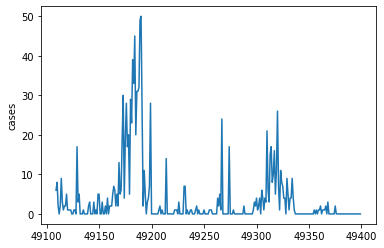

In [ ]:
sns.lineplot(data=vietnam_data, x=vietnam_data.index, y='cases');

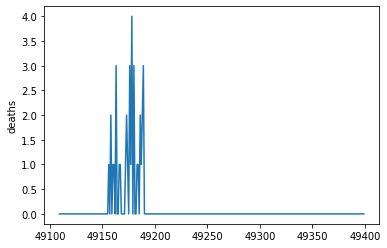

In [ ]:
sns.lineplot(data=vietnam_data, x=vietnam_data.index, y='deaths');